In [1]:
import os
from pathlib import Path

# Definir rutas usando Path
base_dir = Path(r"C:\Users\matia\Documents\Diplomado Machine Learning\Actividad Análisis de Datos\data")
train_dir = base_dir / "train"
test_dir = base_dir / "test"

print("Ruta de train:", train_dir)
print("Ruta de test:", test_dir)


Ruta de train: C:\Users\matia\Documents\Diplomado Machine Learning\Actividad Análisis de Datos\data\train
Ruta de test: C:\Users\matia\Documents\Diplomado Machine Learning\Actividad Análisis de Datos\data\test


In [2]:
# Listar las clases en el set de entrenamiento
classes = [folder.name for folder in train_dir.iterdir() if folder.is_dir()]
test_classes = [folder.name for folder in test_dir.iterdir() if folder.is_dir()]

In [3]:
# ¿Cuántos datos hay?
# Cantidad total de imágenes en train
total_train_imagenes = sum([len(list((train_dir / class_name).glob("*"))) for class_name in classes])
print(f"Total de imágenes en train: {total_train_imagenes}")

#Cantidad total de imágenes en test
total_test_imagenes = sum([len(list((test_dir / class_name).glob("*"))) for class_name in test_classes])
print(f"Total de imágenes en test: {total_test_imagenes}")

Total de imágenes en train: 2637
Total de imágenes en test: 660


In [4]:
from PIL import Image
import numpy as np

# Analizar 5 imágenes de cada clase
for clase in classes:
    print(f"Clase:{clase}")
    imagenes = list((train_dir / clase).glob("*"))[:5]
    for idx, img_path in enumerate(imagenes):
        with Image.open(img_path) as img:
            img_array = np.array(img)
            print(f"  Imagen {idx+1}:")
            print("    Tamaño (ancho x alto):", img.size)
            print("    Nº de canales:", len(img.getbands()))
            print("    Valor mínimo de píxel:", img_array.min())
            print("    Valor máximo de píxel:", img_array.max())
    print("-" * 30)

Clase:benign
  Imagen 1:
    Tamaño (ancho x alto): (224, 224)
    Nº de canales: 3
    Valor mínimo de píxel: 6
    Valor máximo de píxel: 255
  Imagen 2:
    Tamaño (ancho x alto): (224, 224)
    Nº de canales: 3
    Valor mínimo de píxel: 8
    Valor máximo de píxel: 234
  Imagen 3:
    Tamaño (ancho x alto): (224, 224)
    Nº de canales: 3
    Valor mínimo de píxel: 30
    Valor máximo de píxel: 232
  Imagen 4:
    Tamaño (ancho x alto): (224, 224)
    Nº de canales: 3
    Valor mínimo de píxel: 13
    Valor máximo de píxel: 215
  Imagen 5:
    Tamaño (ancho x alto): (224, 224)
    Nº de canales: 3
    Valor mínimo de píxel: 45
    Valor máximo de píxel: 252
------------------------------
Clase:malignant
  Imagen 1:
    Tamaño (ancho x alto): (224, 224)
    Nº de canales: 3
    Valor mínimo de píxel: 9
    Valor máximo de píxel: 200
  Imagen 2:
    Tamaño (ancho x alto): (224, 224)
    Nº de canales: 3
    Valor mínimo de píxel: 10
    Valor máximo de píxel: 240
  Imagen 3:
    Tam

In [5]:
from PIL import Image, UnidentifiedImageError

# Verificar valores incompletos (Archivos vacíos/corruptos o no legibles como imagen o que no puedan abrirse con PIL
problemas = []

for clase in classes:
    carpeta = train_dir / clase
    for img_path in carpeta.glob("*"):
        try:
            with Image.open(img_path) as img:
                img.verify() 
        except (UnidentifiedImageERror, OSError):
            print(f"Archivo dañado o no es imagen: {img_path}")
            problemas.append(img_path)

print(f"Total de archivos con problemas en train: {len(problemas)}")

for clase in classes:
    carpeta = test_dir / clase
    for img_path in carpeta.glob("*"):
        try:
            with Image.open(img_path) as img:
                img.verify() 
        except (UnidentifiedImageERror, OSError):
            print(f"Archivo dañado o no es imagen: {img_path}")
            problemas.append(img_path)

print(f"Total de archivos con problemas en test: {len(problemas)}")

Total de archivos con problemas en train: 0
Total de archivos con problemas en test: 0


In [6]:
# Verificar valores incoherentes
# Revisar si hay imágenes con tamaño o canales distintos
size_set = set()
channel_set = set()
anomalos = []

for clase in classes:
    for img_path in (train_dir / clase).glob("*"):
        try:
            with Image.open(img_path) as img:
                size_set.add(img.size)
                channel_set.add(len(img.getbands()))
                if img.size != (224, 224) or len(img.getbands()) != 3:
                    anomalos.append(img_path)
        except Exception as e:
            pass 
print(f"Distintos tamaños encontrados en train: {size_set}")
print(f"Distintas cantidades de canales encontradas en train: {channel_set}")
print(f"Imágenes con tamaño/canales anómalos en train: {len(anomalos)}")

for clase in classes:
    for img_path in (test_dir / clase).glob("*"):
        try:
            with Image.open(img_path) as img:
                size_set.add(img.size)
                channel_set.add(len(img.getbands()))
                if img.size != (224, 224) or len(img.getbands()) != 3:
                    anomalos.append(img_path)
        except Exception as e:
            pass 
print(f"Distintos tamaños encontrados en test: {size_set}")
print(f"Distintas cantidades de canales encontradas en test: {channel_set}")
print(f"Imágenes con tamaño/canales anómalos en test: {len(anomalos)}")

Distintos tamaños encontrados en train: {(224, 224)}
Distintas cantidades de canales encontradas en train: {3}
Imágenes con tamaño/canales anómalos en train: 0
Distintos tamaños encontrados en test: {(224, 224)}
Distintas cantidades de canales encontradas en test: {3}
Imágenes con tamaño/canales anómalos en test: 0


In [7]:
# ELiminar archivos anómalos 
for archivo in problemas + anomalos:
    try:
        archivo.unlink()
        print(f"Eliminado: {archivo}")
    except Exception as e:
        print(f"No se pudo eliminar: {archivo} ({e})")

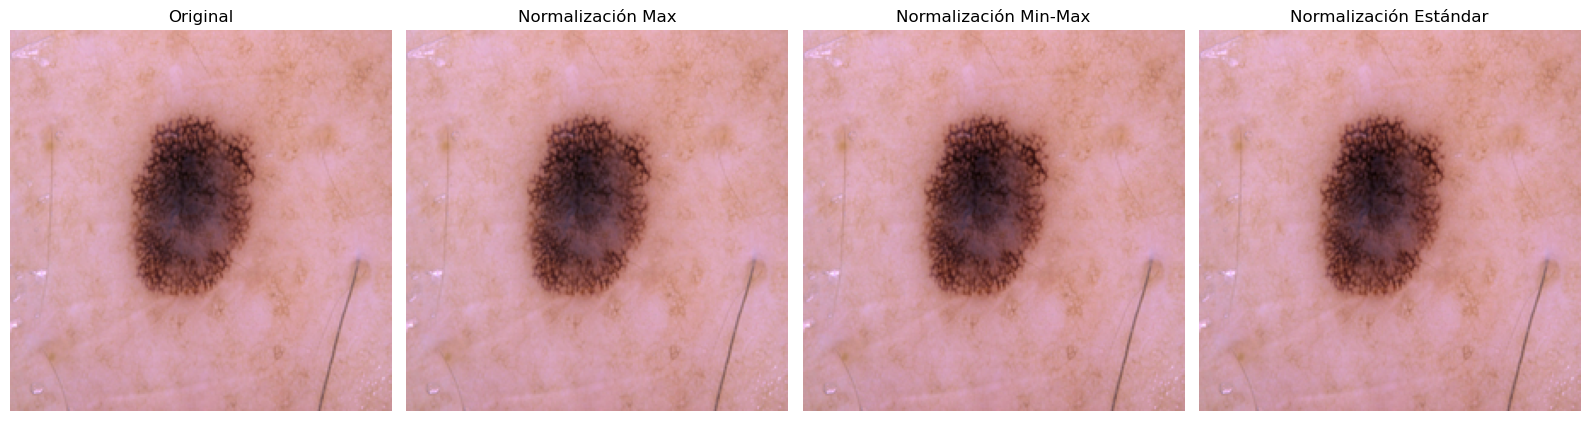

In [8]:
# Normalización
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Usar una imagen de ejemplo
img_path = next((train_dir / classes[0]).glob("*"))
img = Image.open(img_path)
img_array = np.array(img).astype(np.float32) # Convertir a float para las operaciones

# Normalización Max (dividir cada píxel por el valor máximo global)
max_val = img_array.max()
norm_max = img_array / max_val

# Normalización Min-Max (reescala valores entre 0 y 1)
min_val = img_array.min()
norm_min_max = (img_array - min_val) / (max_val - min_val)

# Normalización estándar (resta la media y divide por desviación estándar)
mean_val = img_array.mean()
std_val = img_array.std()
norm_standard = (img_array - mean_val) /std_val

# Visualizar resultados
fig, axs = plt.subplots(1, 4, figsize=(16, 5))
axs[0].imshow(img_array.astype(np.uint8))
axs[0].set_title('Original')
axs[1].imshow(norm_max)
axs[1].set_title('Normalización Max')
axs[2].imshow(norm_min_max)
axs[2].set_title('Normalización Min-Max')
axs[3].imshow(np.clip((norm_standard - norm_standard.min()) / (norm_standard.max() - norm_standard.min()), 0, 1))
axs[3].set_title('Normalización Estándar')
for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()

In [11]:
# Estadísticas imágenes originales
img_orig = img_array.ravel()
img_minmax = norm_min_max.ravel() # Normalización Min-Max presenta mayores ventajas en este caso (no requiere cálculos avanzados y los datos son más fáciles de interpretar)

def calcular_estadisticas(nombre,data):
    print(f"\n--Estadísticas {nombre}--")
    print(f"Rango: {np.max(data)- np.min(data):.4f}")
    print(f"Media: {np.mean(data):.4f}")
    print(f"Mediana: {np.median(data):.4f}")
    print(f"Desviación Estándar: {np.std(data):.4f}")

calcular_estadisticas("Antes de la normalización", img_orig)
calcular_estadisticas("Después de la normalización Min-Max",img_minmax)


--Estadísticas Antes de la normalización--
Rango: 249.0000
Media: 166.3532
Mediana: 166.0000
Desviación Estándar: 44.0096

--Estadísticas Después de la normalización Min-Max--
Rango: 1.0000
Media: 0.6440
Mediana: 0.6426
Desviación Estándar: 0.1767


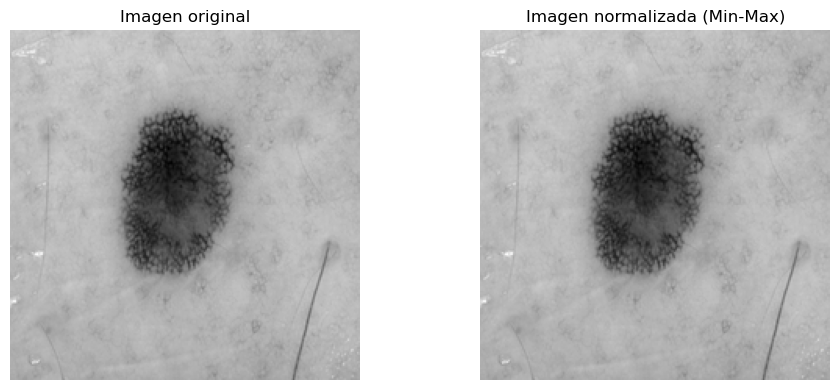

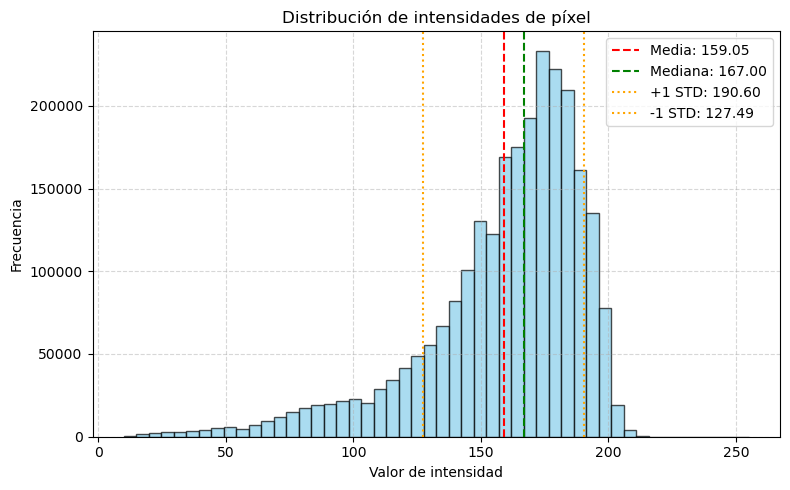

In [12]:
# Directorio base y clase a usar
N = 50  # Número de imágenes a analizar
selected_class = classes[0]
selected_dir = train_dir / selected_class

# Leer las primeras N imágenes
images = []
for img_path in list(selected_dir.glob("*"))[:N]:
    img = Image.open(img_path).convert("L")  # Convertimos a escala de grises
    img_array = np.array(img).astype(np.float32)
    images.append(img_array)

# Convertir a array 3D (N, H, W)
images_np = np.stack(images)

# Normalización Min-Max
img_orig = images_np[0]
img_min = img_orig.min()
img_max = img_orig.max()
img_norm = (img_orig - img_min) / (img_max - img_min)

# Visualización: imagen original y normalizada
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_orig, cmap='gray')
plt.title("Imagen original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_norm, cmap='gray')
plt.title("Imagen normalizada (Min-Max)")
plt.axis("off")

plt.tight_layout()
plt.show()

# -----------------------------------------
# Distribución de valores en el dataset
all_pixels = images_np.ravel()

mean_val = np.mean(all_pixels)
median_val = np.median(all_pixels)
std_val = np.std(all_pixels)

# Histograma
plt.figure(figsize=(8, 5))
plt.hist(all_pixels, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_val, color='red', linestyle='--', label=f"Media: {mean_val:.2f}")
plt.axvline(median_val, color='green', linestyle='--', label=f"Mediana: {median_val:.2f}")
plt.axvline(mean_val + std_val, color='orange', linestyle=':', label=f"+1 STD: {(mean_val + std_val):.2f}")
plt.axvline(mean_val - std_val, color='orange', linestyle=':', label=f"-1 STD: {(mean_val - std_val):.2f}")
plt.title("Distribución de intensidades de píxel")
plt.xlabel("Valor de intensidad")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()